<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/(T%20Orth)cosian%20dist_%2025%20instance_2000%20pair_%208%20outer%20shift_Threshold%20verification%20with%20Middle_TP-FN_TN-FP_FAR-FFR-EER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.6MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[10,40,61]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =8  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [6]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model
from keras import backend as KerasBackend
from keras.callbacks import EarlyStopping



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Automatically created module for IPython interactive environment


In [7]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [12]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

1171

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        

        # Orthogonal Channel
        DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        DataChannelsOrt[e][2]=DataChannelsNormal[e][2]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[e][1].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag

        e = e+1
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


Epoch 1/50
1235/1235 [==============================] - 35s 28ms/step - loss: 2.9871 - acc: 0.1977 - val_loss: 1.8471 - val_acc: 0.4795
Epoch 2/50
1235/1235 [==============================] - 32s 26ms/step - loss: 1.5882 - acc: 0.5058 - val_loss: 0.8718 - val_acc: 0.7556
Epoch 3/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.8787 - acc: 0.7163 - val_loss: 0.5069 - val_acc: 0.8465
Epoch 4/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.5507 - acc: 0.8181 - val_loss: 0.4205 - val_acc: 0.8596
Epoch 5/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.3682 - acc: 0.8781 - val_loss: 0.2214 - val_acc: 0.9295
Epoch 6/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.2545 - acc: 0.9139 - val_loss: 0.1275 - val_acc: 0.9631
Epoch 7/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.1831 - acc: 0.9378 - val_loss: 0.1420 - val_acc: 0.9524
Epoch 8/50
1235/1235 [==========================

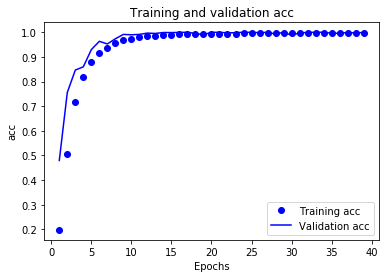

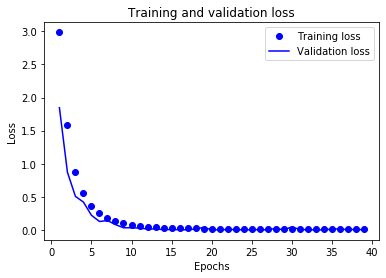

In [159]:
# Construct Data Generator

GenTrainData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData(BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                ListRawDataMain=list_rawdataTemp.copy(),
                                SubjectArrayShuffled=subject_number_array_shuffled,
                                ListChannel=list_channel,
                                RemoveBaseLineFlag=RemoveBaseLine,
                                OrthogonalFlag=Orthogonal,
                                WindowLen=window_len,
                                OuterSampleShift=outer_sample_shift,
                                InnerSampleShift=inner_sample_shift,
                                SampelNumberPerSec=sampel_number_per_sec,
                                ImageArrayShuffled=test_shuff)

#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same', input_shape = (window_len,160,ch_number) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(subject_numberT, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

#################################################################################################
earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)
# Train the Model
history = model.fit_generator(epochs =50,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              callbacks=[earlystopping_callback],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
#model.save('/content/drive/My Drive/mymodels/orth_newmodel_Oz_T7_C3.h5')

In [16]:
model = load_model('/content/drive/My Drive/mymodels/orth_newmodel_Oz_T7_C3.h5')
model.summary()
model.pop()
model.pop()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 160, 128)      3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 80, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 78, 256)        295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 39, 256)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 37, 512)        1180160   
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject

In [0]:
total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)



In [18]:
import h5py
#hf = h5py.File('/content/drive/My Drive/mymodels/total_vectors_orth_newmodel_Oz_T7_C3.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/mymodels/dataset_total_vectors', data=total_vector)
#hf.close()
hf = h5py.File('/content/drive/My Drive/mymodels/total_vectors_orth_newmodel_Oz_T7_C3.h5', 'r')
vec = hf.get('/content/drive/My Drive/mymodels/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 1171, 1024), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 25
  Batch_size = 25
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+"(2) h5 file- cosian dist task1_Orth new model" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,30):

      threshold =0.25+ (j*0.004)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num : sample_img_num *2]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j], list_FAR[j], list_FRR[j] , list_EER[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.26 . 
 96.75 % 
 true_result: 1935 false_result: 65 
 TP: 948 FN: 52 FRR: 0.052 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0325 

0.27 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 957 FN: 43 FRR: 0.043 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.028499999999999998 

0.28 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 966 FN: 34 FRR: 0.034 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.0285 

0.29 . 
 98.45 % 
 true_result: 1969 false_result: 31 
 TP: 986 FN: 14 FRR: 0.014 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.0155 

0.3 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 995 FN: 5 FRR: 0.005 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.019 

0.31 . 
 98.3 % 
 true_result: 1966 false_result: 34 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.017 

0.32 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 993 FN: 

No handles with labels found to put in legend.


0.39 . 
 94.3 % 
 true_result: 1886 false_result: 114 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 886 FP: 114 FAR: 0.114 
 EER: 0.057 



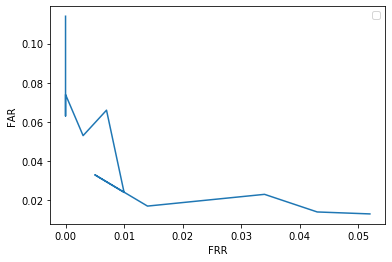

In [190]:
#1. train subject , train subject
counter_true_false_result(0,89, 0,89) 

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.255 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.04 

0.26 . 
 96.6 % 
 true_result: 1932 false_result: 68 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.034 

0.265 . 
 96.7 % 
 true_result: 1934 false_result: 66 
 TP: 959 FN: 41 FRR: 0.041 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.033 

0.27 . 
 97.0 % 
 true_result: 1940 false_result: 60 
 TP: 959 FN: 41 FRR: 0.041 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.03 

0.275 . 
 96.85 % 
 true_result: 1937 false_result: 63 
 TP: 966 FN: 34 FRR: 0.034 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0315 

0.28 . 
 96.95 % 
 true_result: 1939 false_result: 61 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0305 

0.28500000000000003 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 988 FN: 

No handles with labels found to put in legend.


0.32 . 
 97.65 % 
 true_result: 1953 false_result: 47 
 TP: 995 FN: 5 FRR: 0.005 
 TN: 958 FP: 42 FAR: 0.042 
 EER: 0.0235 



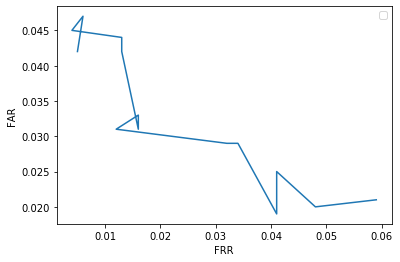

In [21]:
#2. train subject , new subject

counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.255 . 
 92.7 % 
 true_result: 1854 false_result: 146 
 TP: 872 FN: 128 FRR: 0.128 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.073 

0.26 . 
 94.0 % 
 true_result: 1880 false_result: 120 
 TP: 894 FN: 106 FRR: 0.106 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.06 

0.265 . 
 94.8 % 
 true_result: 1896 false_result: 104 
 TP: 922 FN: 78 FRR: 0.078 
 TN: 974 FP: 26 FAR: 0.026 
 EER: 0.052 

0.27 . 
 95.5 % 
 true_result: 1910 false_result: 90 
 TP: 931 FN: 69 FRR: 0.069 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.045000000000000005 

0.275 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 945 FN: 55 FRR: 0.055 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.0395 

0.28 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.0395 

0.28500000000000003 . 
 96.6 % 
 true_result: 1932 false_resu

No handles with labels found to put in legend.


0.32 . 
 96.8 % 
 true_result: 1936 false_result: 64 
 TP: 993 FN: 7 FRR: 0.007 
 TN: 943 FP: 57 FAR: 0.057 
 EER: 0.032 



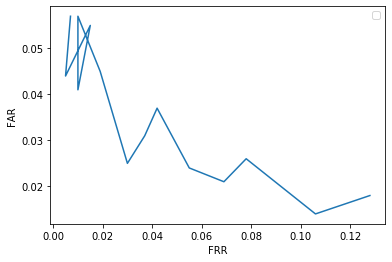

In [22]:
#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.255 . 
 94.4 % 
 true_result: 1888 false_result: 112 
 TP: 889 FN: 111 FRR: 0.111 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.056 

0.26 . 
 94.95 % 
 true_result: 1899 false_result: 101 
 TP: 906 FN: 94 FRR: 0.094 
 TN: 993 FP: 7 FAR: 0.007 
 EER: 0.0505 

0.265 . 
 95.15 % 
 true_result: 1903 false_result: 97 
 TP: 905 FN: 95 FRR: 0.095 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.0485 

0.27 . 
 96.3 % 
 true_result: 1926 false_result: 74 
 TP: 929 FN: 71 FRR: 0.071 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.037 

0.275 . 
 97.0 % 
 true_result: 1940 false_result: 60 
 TP: 948 FN: 52 FRR: 0.052 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.03 

0.28 . 
 96.55 % 
 true_result: 1931 false_result: 69 
 TP: 943 FN: 57 FRR: 0.057 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.0345 

0.28500000000000003 . 
 97.8 % 
 true_result: 1956 false_result: 44 
 TP: 971 FN:

No handles with labels found to put in legend.


0.32 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.0205 



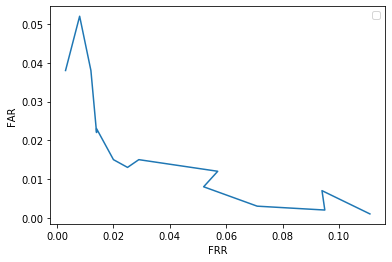

In [23]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.255 . 
 95.7 % 
 true_result: 1914 false_result: 86 
 TP: 930 FN: 70 FRR: 0.07 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.043000000000000003 

0.26 . 
 96.4 % 
 true_result: 1928 false_result: 72 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.036000000000000004 

0.265 . 
 96.4 % 
 true_result: 1928 false_result: 72 
 TP: 949 FN: 51 FRR: 0.051 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.036 

0.27 . 
 96.9 % 
 true_result: 1938 false_result: 62 
 TP: 960 FN: 40 FRR: 0.04 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.031 

0.275 . 
 97.25 % 
 true_result: 1945 false_result: 55 
 TP: 967 FN: 33 FRR: 0.033 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.0275 

0.28 . 
 97.2 % 
 true_result: 1944 false_result: 56 
 TP: 969 FN: 31 FRR: 0.031 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.028 

0.28500000000000003 . 
 97.0 % 
 true_result: 1940 fal

No handles with labels found to put in legend.


0.32 . 
 97.7 % 
 true_result: 1954 false_result: 46 
 TP: 997 FN: 3 FRR: 0.003 
 TN: 957 FP: 43 FAR: 0.043 
 EER: 0.023 



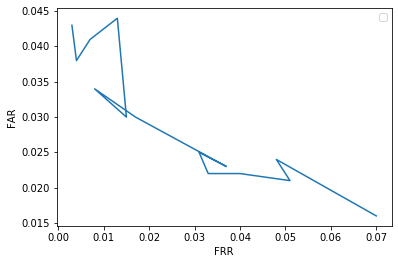

In [24]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)

Successfully created the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/(2) h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 
0.252 . 
 95.95 % 
 true_result: 1919 false_result: 81 
 TP: 934 FN: 66 FRR: 0.066 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0405 

0.254 . 
 96.8 % 
 true_result: 1936 false_result: 64 
 TP: 948 FN: 52 FRR: 0.052 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.032 

0.256 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 949 FN: 51 FRR: 0.051 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.0355 

0.258 . 
 97.1 % 
 true_result: 1942 false_result: 58 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.029 

0.26 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 956 FN: 44 FRR: 0.044 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0295 

0.262 . 
 96.8 % 
 true_result: 1936 false_result: 64 
 TP: 960 FN: 40 FRR: 0.04 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.032 

0.264 . 
 97.1 % 
 true_result: 1942 false_result: 58 
 TP: 961 FN: 39 F

No handles with labels found to put in legend.


0.308 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 991 FN: 9 FRR: 0.009 
 TN: 966 FP: 34 FAR: 0.034 
 EER: 0.021500000000000002 



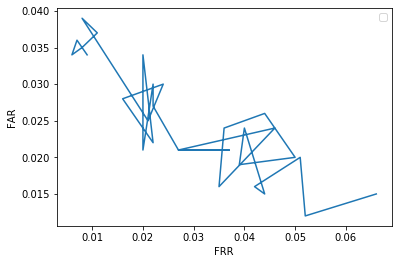

In [28]:
#1. train subject , train subject
counter_true_false_result(0,89, 0,89) 

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/(2) h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.252 . 
 95.9 % 
 true_result: 1918 false_result: 82 
 TP: 934 FN: 66 FRR: 0.066 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.041 

0.254 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 942 FN: 58 FRR: 0.058 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.038 

0.256 . 
 96.35 % 
 true_result: 1927 false_result: 73 
 TP: 945 FN: 55 FRR: 0.055 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0365 

0.258 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 962 FN: 38 FRR: 0.038 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.028499999999999998 

0.26 . 
 96.5 % 
 true_result: 1930 false_result: 70 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.035 

0.262 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 943 FN: 57 FRR: 0.057 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.0385 

0.264 . 
 97.0 % 
 true_result: 1940 false_result: 60 
 TP: 96

No handles with labels found to put in legend.


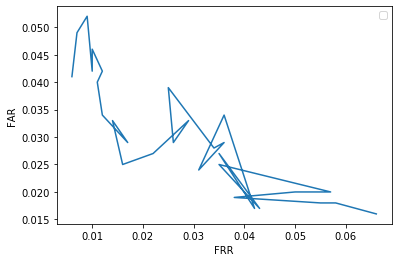

In [29]:
#2. train subject , new subject
counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/(2) h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.254 . 
 93.8 % 
 true_result: 1876 false_result: 124 
 TP: 895 FN: 105 FRR: 0.105 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.062 

0.258 . 
 93.9 % 
 true_result: 1878 false_result: 122 
 TP: 892 FN: 108 FRR: 0.108 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.061 

0.262 . 
 94.1 % 
 true_result: 1882 false_result: 118 
 TP: 899 FN: 101 FRR: 0.101 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.059000000000000004 

0.266 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 931 FN: 69 FRR: 0.069 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.0465 

0.27 . 
 95.85 % 
 true_result: 1917 false_result: 83 
 TP: 933 FN: 67 FRR: 0.067 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.0415 

0.274 . 
 96.25 % 
 true_result: 1925 false_result: 75 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.037500000000000006 

0.278 . 
 96.4 % 
 true_result: 1928 fa

No handles with labels found to put in legend.


0.366 . 
 95.5 % 
 true_result: 1910 false_result: 90 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 910 FP: 90 FAR: 0.09 
 EER: 0.045 



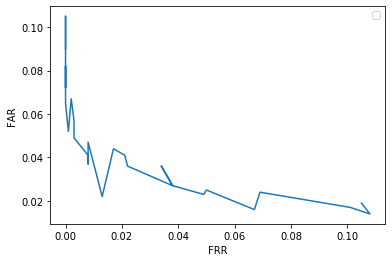

In [31]:
#3. new subject , new subject
counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/(2) h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.254 . 
 94.1 % 
 true_result: 1882 false_result: 118 
 TP: 883 FN: 117 FRR: 0.117 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.059000000000000004 

0.258 . 
 95.1 % 
 true_result: 1902 false_result: 98 
 TP: 902 FN: 98 FRR: 0.098 
 TN: 1000 FP: 0 FAR: 0.0 
 EER: 0.049 

0.262 . 
 95.4 % 
 true_result: 1908 false_result: 92 
 TP: 911 FN: 89 FRR: 0.089 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.046 

0.266 . 
 95.8 % 
 true_result: 1916 false_result: 84 
 TP: 922 FN: 78 FRR: 0.078 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.042 

0.27 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 932 FN: 68 FRR: 0.068 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.035500000000000004 

0.274 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 944 FN: 56 FRR: 0.056 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0335 

0.278 . 
 96.8 % 
 true_result: 1936 false_result:

No handles with labels found to put in legend.


0.366 . 
 95.55 % 
 true_result: 1911 false_result: 89 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 911 FP: 89 FAR: 0.089 
 EER: 0.0445 



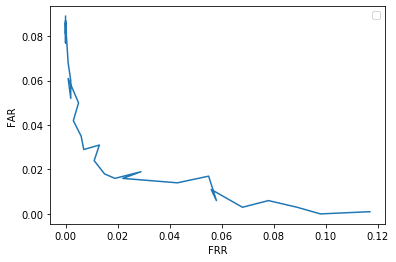

In [32]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/(2) h5 file- cosian dist task1_Orth new model25sample num_2000pair_ouer shift8 failed
0.254 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 932 FN: 68 FRR: 0.068 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.04 

0.258 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 937 FN: 63 FRR: 0.063 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.04 

0.262 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 942 FN: 58 FRR: 0.058 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.039 

0.266 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 955 FN: 45 FRR: 0.045 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.0335 

0.27 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 973 FN: 27 FRR: 0.027 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.024 

0.274 . 
 96.85 % 
 true_result: 1937 false_result: 63 
 TP: 970 FN: 30 FRR: 0.03 
 TN: 967 FP: 33 FAR: 0.033 
 EER: 0.0315 

0.278 . 
 97.15 % 
 true_result: 1943 false_result: 57 
 TP: 966 FN: 34 FRR: 0.

No handles with labels found to put in legend.


0.366 . 
 95.6 % 
 true_result: 1912 false_result: 88 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 912 FP: 88 FAR: 0.088 
 EER: 0.044 



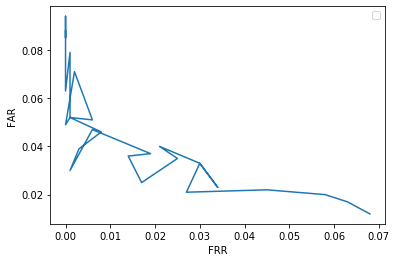

In [33]:
#5. all subject , all subject
counter_true_false_result(0,107, 0,107)

In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 20
  Batch_size = 20
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+"h5 file-cosian dist task1" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_NOOO MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,40):

      threshold =0.150+ (j*0.002)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled1 = random.randint(0,subject_img_number-10)
          #np.random.shuffle(pre_S1_img_shuffled)
          pre_S1_img_shuffled2 = random.randint(0,subject_img_number-10)
          while(pre_S1_img_shuffled1 == pre_S1_img_shuffled2):
            pre_S1_img_shuffled2 = random.randint(0,subject_img_number)



          #np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled1
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled2

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=random.randint(0,subject_img_number-10)
          #np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j], list_FAR[j], list_FRR[j] , list_EER[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])
